* 출처 : https://github.com/FinanceData/FinanceDataReader/tree/master/tutorial


# 여러 종목의 가격을 한번에

## 한글 폰트 설치 및 matplotlib 설정

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rc("font", family = "Malgun Gothic")
plt.rc("figure", figsize = (12,6))
plt.rc("axes", grid = True)
plt.rc("axes", unicode_minus = False)
plt.rc("axes.formatter", useoffset = False)
plt.rc("axes.formatter", limits = (-10000,10000))

#plt.rcParams = plt.rc
# plt.rcParams["font.family"] = 'nanummyeongjo'
# plt.rcParams["axes.grid"] = True
# plt.rcParams["figure.figsize"] = (12,6)
# plt.rcParams["axes.formatter.useoffset"] = False
# plt.rcParams['axes.unicode_minus'] = False
# plt.rcParams["axes.formatter.limits"] = -10000, 10000

## FinanceDataReader 설치

In [9]:
# !pip -q install finance-datareader

## 한 종목의 가격 가져오기

In [10]:
import FinanceDataReader as fdr

In [11]:
#KB금융 = 105560
df = fdr.DataReader(symbol = "105560", start = "20190101", end = "20191231")
df.head(5)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-01-02,46700,46900,45600,45950,636199,-0.011828
2019-01-03,46600,46800,46200,46450,1275976,0.010881
2019-01-04,46500,46600,45600,45650,784105,-0.017223
2019-01-07,45800,46650,45450,45450,957133,-0.004381
2019-01-08,45900,45950,45300,45500,868450,0.001100


## 여러 종목의 종가(close) 가져오기

In [12]:
stock_list = [
  ["삼성전자", "005930"],
  ["SK하이닉스", "000660"],
  ["현대차", "005380"],
  ["셀트리온", "068270"],
  ["LG화학", "051910"],
  ["POSCO", "005490"],
  ["삼성물산", "028260"],
  ["NAVER", "035420"],
]

In [13]:
import pandas as pd

In [14]:
fdr.DataReader(symbol = "005930", start = "20190101", end = "20191231").Close

Date
2019-01-02    38750
2019-01-03    37600
2019-01-04    37450
2019-01-07    38750
2019-01-08    38100
              ...  
2019-12-23    55500
2019-12-24    55000
2019-12-26    55400
2019-12-27    56500
2019-12-30    55800
Name: Close, Length: 246, dtype: int64

In [15]:
df_list = [fdr.DataReader(symbol = code, start = "20190101", end = "20191231").Close for name, code in stock_list]
len(df_list)

8

In [16]:
# pd.concat으로 합치기
df = pd.concat(df_list,axis=1)
df.columns = [name for name,code in stock_list]
df.head(1)

,삼성전자,SK하이닉스,현대차,셀트리온,LG화학,POSCO,삼성물산,NAVER
Date,,,,,,,,
2019-01-02,38750,60600,114000,201193,337000,237000,104000,118000


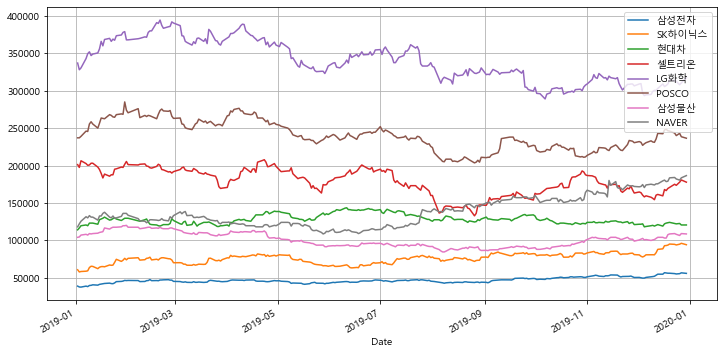

In [17]:
df.plot()

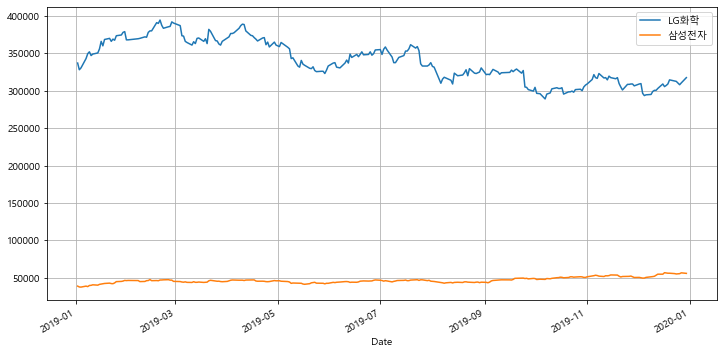

In [18]:
df[["LG화학","삼성전자"]].plot()

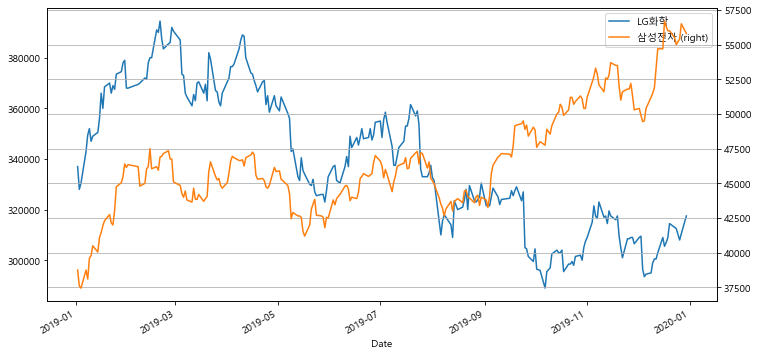

In [19]:
df[["LG화학","삼성전자"]].plot(secondary_y = "삼성전자")

In [20]:
df2 = df[["LG화학","삼성전자"]].copy()

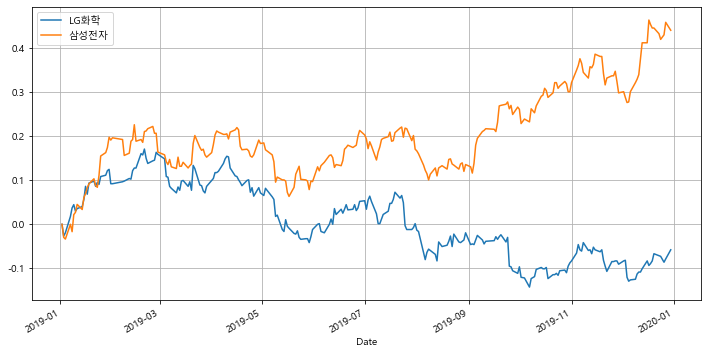

In [21]:
df2_plot = df2 / df2.iloc[0]-1
df2_plot.plot()

## 개별 종목의 2019년 수익률 비교

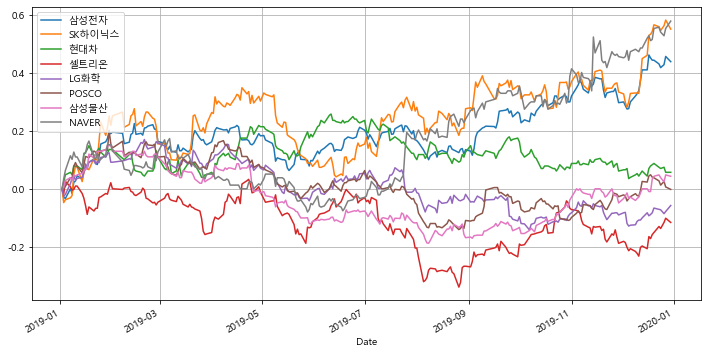

In [22]:
df_norm = df / df.iloc[0]-1
df_norm.plot()

In [23]:
df_norm.iloc[-1].sort_values(ascending = False)*100

NAVER     58.050847
SK하이닉스    55.280528
삼성전자      44.000000
현대차        5.701754
삼성물산       4.326923
POSCO     -0.210970
LG화학      -5.786350
셀트리온     -11.654978
Name: 2019-12-30 00:00:00, dtype: float64

# 수정주가(Adjusted Price)란?

- 액면분할, 액면병합, 유상증자, 무상증자와 같이 주식 발행수의 변화가 발생 시 주가 변화
- ex)액면분할 : 1주를 2주로, 주가 : 1/2

In [24]:
import FinanceDataReader as fdr

In [25]:
df = fdr.DataReader(symbol = '005930', start = "20180425", end = "20180531")
df.head(7)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-04-25,49220,50500,49220,50400,332292,-0.001189
2018-04-26,50420,52160,50400,52140,360931,0.034524
2018-04-27,53380,53639,52440,53000,606216,0.016494
2018-04-30,0,0,0,53000,0,0.000000
2018-05-02,0,0,0,53000,0,0.000000
2018-05-03,0,0,0,53000,0,0.000000
2018-05-04,53000,53900,51800,51900,39565391,-0.020755


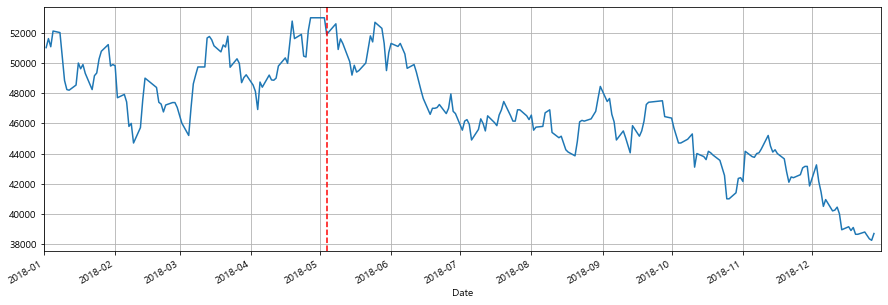

In [31]:
df = fdr.DataReader(symbol = '005930', start = "20180101", end = "20181231")
ax = df.Close.plot(figsize = (15,5))

ax.set_xlim(["20180101","20181231"])
ax.axvline("20180504",ls = "--", color = "r")

# 섹터 평균 수익률과 개별 종목의 수익률

## 한국거래소(KRX)의 전체 종목 가져오기

In [2]:
import FinanceDataReader as fdr
krx = fdr.StockListing("KRX")

In [3]:
krx.head(3)

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,이현우,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시


In [7]:
krx.groupby('Sector').count()

,Symbol,Market,Name,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
Sector,,,,,,,,,
1차 비철금속 제조업,18,18,18,17,18,18,18,17,18
1차 철강 제조업,57,57,57,57,57,57,57,56,57
가구 제조업,8,8,8,8,8,8,8,8,8
가전제품 및 정보통신장비 소매업,2,2,2,2,2,2,2,2,2
가정용 기기 제조업,9,9,9,9,9,9,9,9,9
...,...,...,...,...,...,...,...,...,...
해상 운송업,5,5,5,5,5,5,5,4,5
"해체, 선별 및 원료 재생업",1,1,1,1,1,1,1,1,1
화학섬유 제조업,10,10,10,10,10,10,10,9,10


In [12]:
krx.groupby("Sector").count().sort_values("Symbol",ascending = False)[:30]

,Symbol,Market,Name,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
Sector,,,,,,,,,
특수 목적용 기계 제조업,142,142,142,142,142,142,142,132,142
소프트웨어 개발 및 공급업,139,139,139,138,139,139,139,133,139
전자부품 제조업,122,122,122,121,122,122,122,114,122
자동차 신품 부품 제조업,97,97,97,97,97,97,97,94,97
기타 금융업,93,93,93,91,93,93,93,81,93
의약품 제조업,93,93,93,93,93,93,93,90,93
기타 화학제품 제조업,91,91,91,91,91,91,91,83,91
통신 및 방송 장비 제조업,72,72,72,72,72,72,72,65,72
금융 지원 서비스업,72,72,72,71,72,72,72,23,72


In [20]:
sectors = dict(list(krx.groupby('Sector')))

In [25]:
print("count:", len(sectors))
list(sectors.keys())[:10]

count: 158


['1차 비철금속 제조업',
 '1차 철강 제조업',
 '가구 제조업',
 '가전제품 및 정보통신장비 소매업',
 '가정용 기기 제조업',
 '가죽, 가방 및 유사제품 제조업',
 '개인 및 가정용품 임대업',
 '건물 건설업',
 '건물설비 설치 공사업',
 '건축기술, 엔지니어링 및 관련 기술 서비스업']

In [28]:
med_sec = sectors['의료용품 및 기타 의약 관련제품 제조업']
print('row count :', len(med_sec))
med_sec.head(3)

row count : 29


,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
2165,138610,KOSDAQ,나이벡,의료용품 및 기타 의약 관련제품 제조업,"치아미백제,치과용 골이식재",2011-07-13,12월,정종평,NaN,충청북도
2222,142280,KOSDAQ,녹십자엠에스,의료용품 및 기타 의약 관련제품 제조업,"혈액백, 진단시약, 혈액투석액",2014-12-17,12월,안은억,http://www.greencrossms.com,경기도
2252,343090,KONEX,단디바이오,의료용품 및 기타 의약 관련제품 제조업,"패혈증 치료제, 면역항암제 전달기술 등",2020-04-24,12월,박영민,http:// www.dandibio.com,서울특별시


## 개별 종목의 가격 데이터 가져오기

In [31]:
import pandas as pd
import FinanceDataReader as fdr

In [47]:
med = pd.DataFrame()

for idx,row in med_sec.iterrows():
    code, name = row["Symbol"], row["Name"]
    print(code,name)
    
    #개별 종목 가격 가져오기
    df = fdr.DataReader(symbol = code, start = "20190101", end = "20191231")
    
    #가격 데이터의 종가를 컬럼으로 추가
    med[name] = df["Close"]

138610 나이벡
142280 녹십자엠에스
343090 단디바이오
233250 메디안디노스틱
059210 메타바이오메드
206640 바디텍메드
064550 바이오니아
100700 세운메디칼
253840 수젠텍
096530 씨젠
246720 아스타
260660 알리코제약
174900 앱클론
950130 엑세스바이오
153710 옵티팜
307280 원바이오젠
246960 이노테라피
086890 이수앱지스
216080 제테마
229000 젠큐릭스
228760 지노믹트리
352770 클리노믹스
340570 티앤엘
046210 파나진
303360 프로테옴텍
241820 피씨엘
304840 피플바이오
042520 한스바이오메드
205470 휴마시스


In [49]:
med.head(3)

,나이벡,녹십자엠에스,단디바이오,메디안디노스틱,메타바이오메드,바디텍메드,바이오니아,세운메디칼,수젠텍,씨젠,...,젠큐릭스,지노믹트리,클리노믹스,티앤엘,파나진,프로테옴텍,피씨엘,피플바이오,한스바이오메드,휴마시스
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,9358,9866,NaN,27000,2960,10400,7540,3780,12900,15600,...,20900,27550,NaN,NaN,4475,19400,9530,NaN,24600,1335
2019-01-03,8696,9661,NaN,27450,2920,9990,7200,3830,13000,14750,...,20650,27500,NaN,NaN,4380,18800,9360,NaN,23450,1310
2019-01-04,9140,9784,NaN,27450,2965,10200,7380,3805,12950,15000,...,21500,27500,NaN,NaN,4505,18850,9630,NaN,24100,1330


결측치가 포함된 컬럼 제외

In [51]:
med = med.dropna(axis = 1)
med

,나이벡,녹십자엠에스,메디안디노스틱,메타바이오메드,바디텍메드,바이오니아,세운메디칼,수젠텍,씨젠,아스타,...,옵티팜,원바이오젠,이수앱지스,젠큐릭스,지노믹트리,파나진,프로테옴텍,피씨엘,한스바이오메드,휴마시스
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,9358,9866,27000,2960,10400,7540,3780,12900,15600,8290,...,9130,2159,6170,20900,27550,4475,19400,9530,24600,1335
2019-01-03,8696,9661,27450,2920,9990,7200,3830,13000,14750,8120,...,9030,2165,6010,20650,27500,4380,18800,9360,23450,1310
2019-01-04,9140,9784,27450,2965,10200,7380,3805,12950,15000,8030,...,9260,2170,6200,21500,27500,4505,18850,9630,24100,1330
2019-01-07,9140,9784,27450,3020,10250,7210,3780,12950,15200,7970,...,9100,2159,6350,23900,27700,4665,18900,9700,24650,1340
2019-01-08,9053,9702,27500,3040,9980,7080,3730,12900,15600,7800,...,9080,2159,6300,23900,27700,4600,18450,9720,24800,1340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,9710,5140,39200,2700,9600,6570,3235,5400,29700,5090,...,9070,2202,6700,15250,22150,2215,15450,7910,23550,1375
2019-12-24,10150,5060,39200,2630,9450,6500,3200,5210,30300,5040,...,8840,2207,6490,15900,21250,2185,14450,7870,23550,1355
2019-12-26,10500,5110,39200,2675,9670,6620,3225,5270,30300,4960,...,8810,2213,6460,16200,22100,2320,14000,7890,24100,1355


### 수익률 계산

In [56]:
acc_rets = med/med.iloc[0]-1
acc_rets

,나이벡,녹십자엠에스,메디안디노스틱,메타바이오메드,바디텍메드,바이오니아,세운메디칼,수젠텍,씨젠,아스타,...,옵티팜,원바이오젠,이수앱지스,젠큐릭스,지노믹트리,파나진,프로테옴텍,피씨엘,한스바이오메드,휴마시스
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-01-03,-0.070742,-0.020778,0.016667,-0.013514,-0.039423,-0.045093,0.013228,0.007752,-0.054487,-0.020507,...,-0.010953,0.002779,-0.025932,-0.011962,-0.001815,-0.021229,-0.030928,-0.017838,-0.046748,-0.018727
2019-01-04,-0.023296,-0.008311,0.016667,0.001689,-0.019231,-0.021220,0.006614,0.003876,-0.038462,-0.031363,...,0.014239,0.005095,0.004862,0.028708,-0.001815,0.006704,-0.028351,0.010493,-0.020325,-0.003745
2019-01-07,-0.023296,-0.008311,0.016667,0.020270,-0.014423,-0.043767,0.000000,0.003876,-0.025641,-0.038601,...,-0.003286,0.000000,0.029173,0.143541,0.005445,0.042458,-0.025773,0.017838,0.002033,0.003745
2019-01-08,-0.032592,-0.016623,0.018519,0.027027,-0.040385,-0.061008,-0.013228,0.000000,0.000000,-0.059107,...,-0.005476,0.000000,0.021070,0.143541,0.005445,0.027933,-0.048969,0.019937,0.008130,0.003745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,0.037615,-0.479019,0.451852,-0.087838,-0.076923,-0.128647,-0.144180,-0.581395,0.903846,-0.386007,...,-0.006572,0.019917,0.085900,-0.270335,-0.196007,-0.505028,-0.203608,-0.169990,-0.042683,0.029963
2019-12-24,0.084633,-0.487128,0.451852,-0.111486,-0.091346,-0.137931,-0.153439,-0.596124,0.942308,-0.392039,...,-0.031763,0.022233,0.051864,-0.239234,-0.228675,-0.511732,-0.255155,-0.174187,-0.042683,0.014981
2019-12-26,0.122035,-0.482060,0.451852,-0.096284,-0.070192,-0.122016,-0.146825,-0.591473,0.942308,-0.401689,...,-0.035049,0.025012,0.047002,-0.224880,-0.197822,-0.481564,-0.278351,-0.172088,-0.020325,0.014981


In [57]:
returns=acc_rets.iloc[-1]
returns

나이벡        0.186151
녹십자엠에스    -0.467869
메디안디노스틱    0.481481
메타바이오메드   -0.059122
바디텍메드     -0.072115
바이오니아     -0.099469
세운메디칼     -0.146825
수젠텍       -0.575194
씨젠         0.964744
아스타       -0.413752
알리코제약      0.165339
앱클론       -0.060890
엑세스바이오    -0.532880
옵티팜       -0.009858
원바이오젠      0.022233
이수앱지스      0.077796
젠큐릭스      -0.210526
지노믹트리     -0.148820
파나진       -0.475978
프로테옴텍     -0.280928
피씨엘       -0.154250
한스바이오메드    0.014228
휴마시스       0.041199
Name: 2019-12-30 00:00:00, dtype: float64

In [58]:
returns.sort_values(ascending = False)

씨젠         0.964744
메디안디노스틱    0.481481
나이벡        0.186151
알리코제약      0.165339
이수앱지스      0.077796
휴마시스       0.041199
원바이오젠      0.022233
한스바이오메드    0.014228
옵티팜       -0.009858
메타바이오메드   -0.059122
앱클론       -0.060890
바디텍메드     -0.072115
바이오니아     -0.099469
세운메디칼     -0.146825
지노믹트리     -0.148820
피씨엘       -0.154250
젠큐릭스      -0.210526
프로테옴텍     -0.280928
아스타       -0.413752
녹십자엠에스    -0.467869
파나진       -0.475978
엑세스바이오    -0.532880
수젠텍       -0.575194
Name: 2019-12-30 00:00:00, dtype: float64

In [59]:
returns.mean()

-0.07631768854734372

### 다양한 기간에 대한 수익률

In [62]:
df = med['20191201':'20191231']
acc_rets = df/df.iloc[0]-1
acc_rets = acc_rets.iloc[-1]
acc_rets

나이벡        0.082927
녹십자엠에스    -0.062500
메디안디노스틱    0.000000
메타바이오메드    0.096457
바디텍메드      0.040992
바이오니아      0.046225
세운메디칼      0.028708
수젠텍       -0.041958
씨젠         0.104505
아스타       -0.063584
알리코제약      0.084643
앱클론        0.134371
엑세스바이오    -0.021378
옵티팜        0.030787
원바이오젠     -0.016927
이수앱지스      0.047244
젠큐릭스       0.166078
지노믹트리      0.015152
파나진       -0.062000
프로테옴텍     -0.041237
피씨엘        0.002488
한스바이오메드    0.012170
휴마시스       0.007246
Name: 2019-12-30 00:00:00, dtype: float64

2019.12.30 시점으로 5,10,20,60,120,240일 수익률 구해보기

In [72]:
from datetime import datetime,timedelta
theday = datetime(2019,12,30)

row_dict = {}
for days in [5,10,20,60,120,240]:
    start = theday-timedelta(days)
    end = theday
    print(start,"~",end)
    
    df = med[start:end]
    acc_rets = df/df.iloc[0]-1
    row_dict[days] = acc_rets.iloc[-1]

2019-12-25 00:00:00 ~ 2019-12-30 00:00:00
2019-12-20 00:00:00 ~ 2019-12-30 00:00:00
2019-12-10 00:00:00 ~ 2019-12-30 00:00:00
2019-10-31 00:00:00 ~ 2019-12-30 00:00:00
2019-09-01 00:00:00 ~ 2019-12-30 00:00:00
2019-05-04 00:00:00 ~ 2019-12-30 00:00:00


In [77]:
df_rets = pd.DataFrame(row_dict)
df_rets

,5,10,20,60,120,240
나이벡,0.057143,0.110000,0.131498,0.140802,0.707692,0.149068
녹십자엠에스,0.027397,-0.003795,0.023392,-0.275862,0.013514,-0.414193
메디안디노스틱,0.020408,0.020408,0.000000,-0.024390,0.002506,0.261830
메타바이오메드,0.041121,0.029575,0.067050,0.052930,0.127530,-0.068562
바디텍메드,-0.002068,0.013655,0.025505,0.128655,0.084270,-0.138393
바이오니아,0.025680,0.057632,0.046225,-0.089812,-0.015942,-0.317588
세운메디칼,0.000000,0.001553,0.036977,-0.034431,-0.066570,-0.161248
수젠텍,0.039848,0.000000,-0.035211,-0.094215,-0.125997,-0.619444
씨젠,0.011551,0.040747,0.122711,0.442353,0.377528,0.261317
아스타,-0.020161,-0.067179,-0.074286,-0.356291,-0.041420,-0.370466


In [79]:
# 섹터 전체 기간별 수익률
df_rets.mean()

5      0.028135
10     0.019350
20     0.021675
60    -0.002470
120    0.089779
240   -0.181625
dtype: float64

### 데이터프레임 스타일

In [121]:
def color_negative_red(val):
    color = 'red' if val < 0 else 'black'
#     return 'color: %s' % color #printf 방식(과거 방식)
    return f"color : {color}"

def highlight_max(s):
    is_max = s == s.max()
    #s가 s.max()와 같으면 is_max에 True 저장, 아니면 False 저장
    return ['background-color : yellow' if v else '' for v in is_max]
    # for문으로 is_max 값을 v에 할당하고, v가 True이면 background-color : yellow 출력, 아니면 '' 출력


def highlight_min(s):
    is_min = s == s.min()
    #s가 s.max()와 같으면 is_min에 True 저장, 아니면 False 저장
    return ['background-color : pink' if v else '' for v in is_min]
    # for문으로 is_min 값을 v에 할당하고, v가 True이면 background-color : pink 출력, 아니면 '' 출력


In [126]:
df_rets.style.\
    applymap(color_negative_red).\
    apply(highlight_max).\
    apply(highlight_min)
#여기서 to_excel('filename.csv'index = False)로 하면 해당 색상이 포함된 상태로 엑셀로 저장

,5,10,20,60,120,240
나이벡,0.057143,0.110000,0.131498,0.140802,0.707692,0.149068
녹십자엠에스,0.027397,-0.003795,0.023392,-0.275862,0.013514,-0.414193
메디안디노스틱,0.020408,0.020408,0.000000,-0.024390,0.002506,0.261830
메타바이오메드,0.041121,0.029575,0.067050,0.052930,0.127530,-0.068562
바디텍메드,-0.002068,0.013655,0.025505,0.128655,0.084270,-0.138393
바이오니아,0.025680,0.057632,0.046225,-0.089812,-0.015942,-0.317588
세운메디칼,0.000000,0.001553,0.036977,-0.034431,-0.066570,-0.161248
수젠텍,0.039848,0.000000,-0.035211,-0.094215,-0.125997,-0.619444
씨젠,0.011551,0.040747,0.122711,0.442353,0.377528,0.261317
아스타,-0.020161,-0.067179,-0.074286,-0.356291,-0.041420,-0.370466


# VIX 지수와 관련 종목

In [132]:
import matplotlib.pyplot as plt

plt.rc("axes", grid = True)
plt.rc("figure", figsize = (14,8))
plt.rc("axes.formatter", useoffset = False)
plt.rc("font", family = "Malgun Gothic")
plt.rc("axes", unicode_minus = False)
plt.rc("axes.formatter", limits = (-10000,10000))

## VIX 가격 데이터 (1990 ~ 2020)

In [133]:
import FinanceDataReader as fdr

In [137]:
vix = fdr.DataReader("VIX", "19900101","20200309")

In [139]:
vix.tail(5)

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2020-03-03,36.82,33.64,41.06,24.93,0.0,0.1017
2020-03-04,31.99,34.44,35.58,30.30,0.0,-0.1312
2020-03-05,39.62,33.61,42.84,33.54,0.0,0.2385
2020-03-06,41.94,41.46,54.39,40.84,0.0,0.0586
2020-03-09,54.46,41.94,62.12,41.94,0.0,0.2985


Text(2020-03-09, 54.46, '54.46')

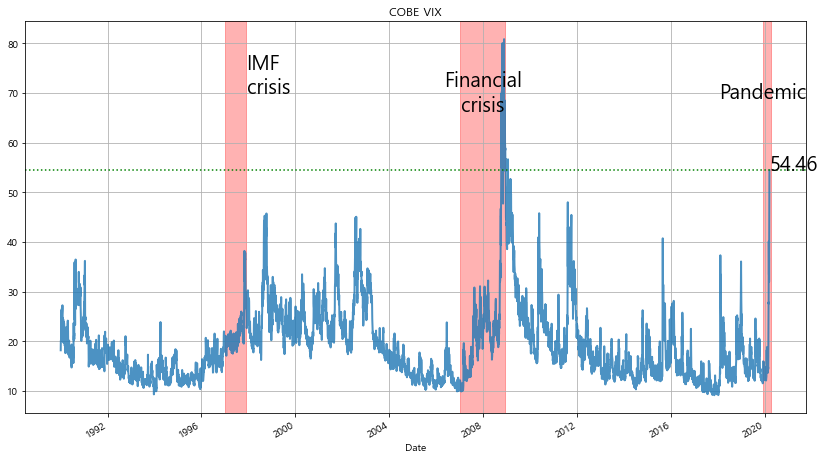

In [156]:
# vix index
ax = vix.Close.plot(lw = 2,alpha = 0.8, title = "COBE VIX")

#외환위기
ax.axvspan("1997-01","1997-12", alpha = 0.3, color = "red")
# ax.axvspan("19970101","19971231", alpha = 0.3, color = "red")
#일자를 쓰지 않을 경우 하이픈으로 년월 이어주기
ax.annotate("IMF\ncrisis", xy = ("19971203", 70), fontsize = 20)

# 금융위기
ax.axvspan('2007-01', '2008-12', alpha=0.3, color='red') 
ax.annotate('Financial\ncrisis', xy=('2008', 70), fontsize=20,
            va = "center", ha = "center") 

# 팬데믹
ax.axvspan('2019-12', '2020-04', alpha=0.3, color='red') 
ax.annotate('Pandemic', xy=('2019-12', 70), fontsize=20,
            va = "center", ha = "center") 

# 2020-03-09 VIX 4.46
ax.axhline(54.46, ls=':', c='g') # 51.55 (2020-03-09 VIX)
ax.annotate('54.46', xy=('2020-03-09', 54.46), fontsize=20)


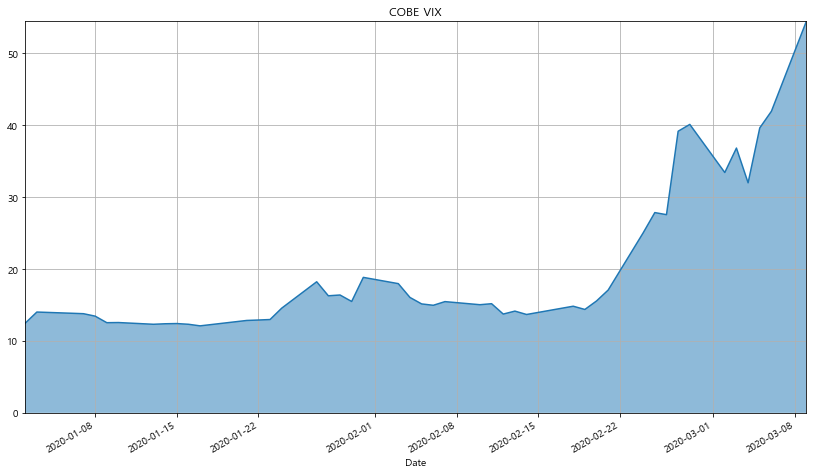

In [163]:
values = vix.loc["20200101":"20200309"].Close
ax = values.plot(figsize = (14,8), grid = True, title = "COBE VIX")
ax.fill_between(values.index, 0, values, alpha = 0.5)
ax.margins(0) #가장자리 없애기

## VIX지수, S&P500지수, KOSPI지수 데이터

In [164]:
import FinanceDataReader as fdr

vix = fdr.DataReader('VIX', '2010-01-01', '2020-03-09') # S&P 500 VIX
kospi = fdr.DataReader('KS11', '2010-01-01', '2020-03-09') # KOSPI index
sp500 = fdr.DataReader('US500', '2010-01-01', '2020-03-09') # S&P 500 index

In [165]:
import pandas as pd

df = pd.concat([vix['Close'], kospi['Close'], sp500['Close']], axis=1)
df.columns = ['VIX', 'KOSPI', 'S&P500']

## S&P500지수와 VIX지수

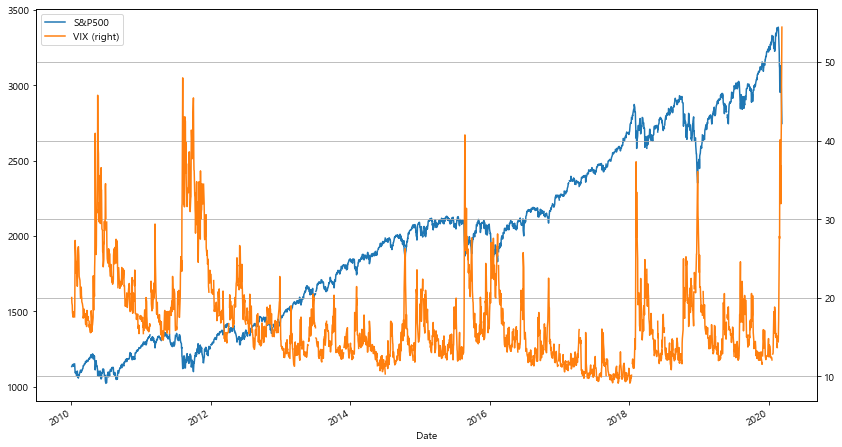

In [166]:
df[['S&P500', 'VIX']].plot(secondary_y='VIX')

## KOSPI지수와 VIX지수

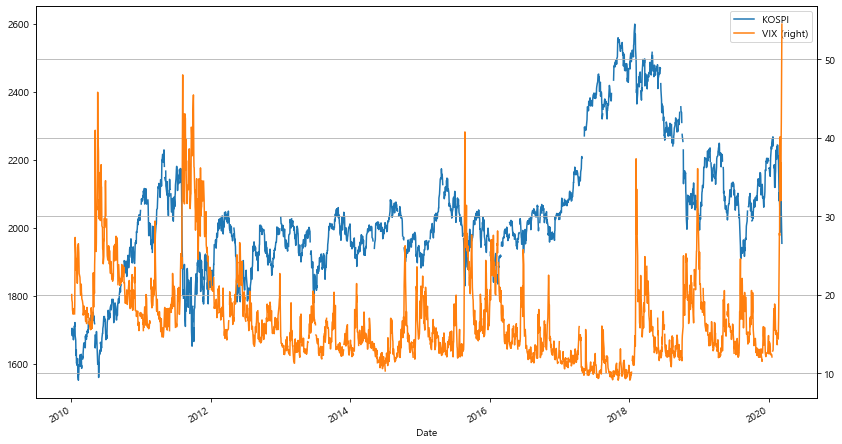

In [167]:
df[['KOSPI', 'VIX']].plot(secondary_y='VIX')

## VIX지수, S&P500지수, KOSPI지수 상관관계

In [169]:
df.corr()

,VIX,KOSPI,S&P500
VIX,1.000000,-0.514774,-0.439172
KOSPI,-0.514774,1.000000,0.704733
S&P500,-0.439172,0.704733,1.000000


## S&P 500 VIX 선물 (해외선물)


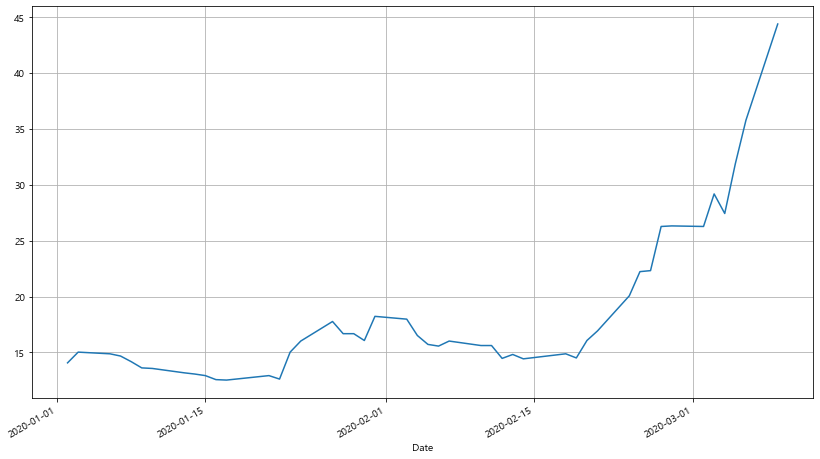

In [170]:
fdr.DataReader('VX', '2020-01-01', '2020-03-09')['Close'].plot()

## 삼성 S&P500 VIX S/T 선물 ETN(H) B (530065)
https://finance.naver.com/item/main.nhn?code=530065

In [171]:
fdr.DataReader('530065', '2020-01-01', '2020-03-09').tail(5)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-03-03,16395,17365,16310,17190,26338,0.020784
2020-03-04,18585,19000,17600,17775,35725,0.034031
2020-03-05,17750,18260,17750,18135,14610,0.020253
2020-03-06,19775,21385,19350,20975,40049,0.156603
2020-03-09,27220,27265,26225,27265,69397,0.299881


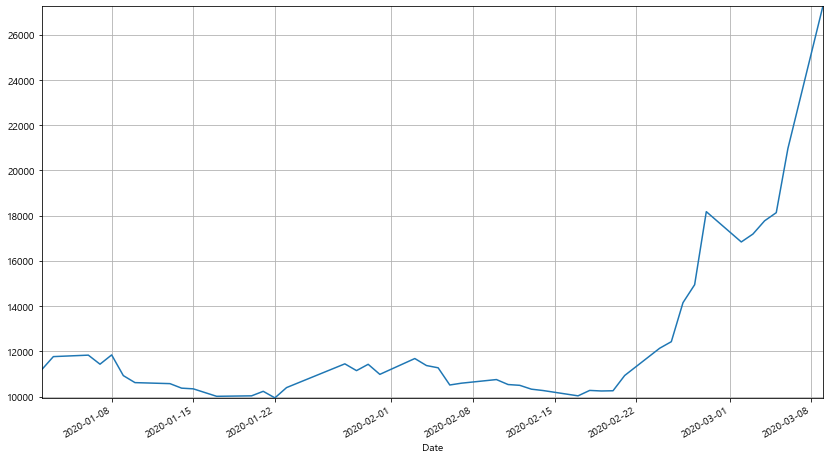

In [177]:
ax = fdr.DataReader('530065', '2020-01-01', '2020-03-09').Close.plot()
ax.margins(0)

In [178]:
price = fdr.DataReader('530065', '2020-01-01', '2020-03-09')['Close']

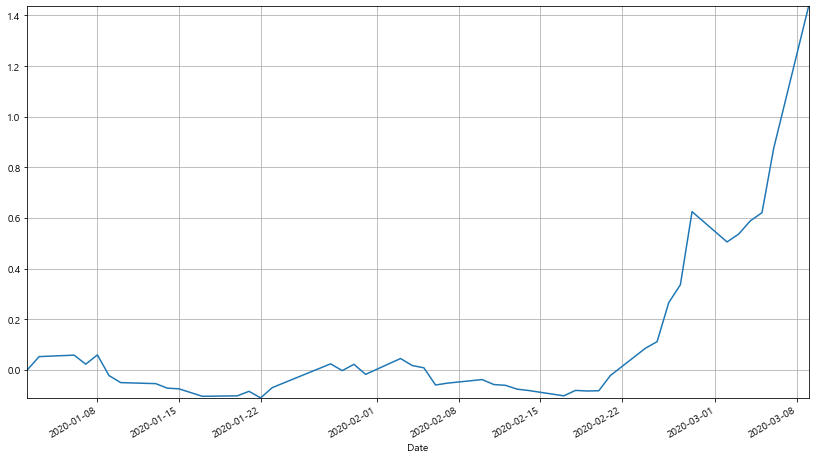

In [179]:
returns = price / price[0] - 1.0
ax = returns.plot()
ax.margins(0)

In [180]:
returns[-1]

1.436550491510277